# Hypothesis Testing

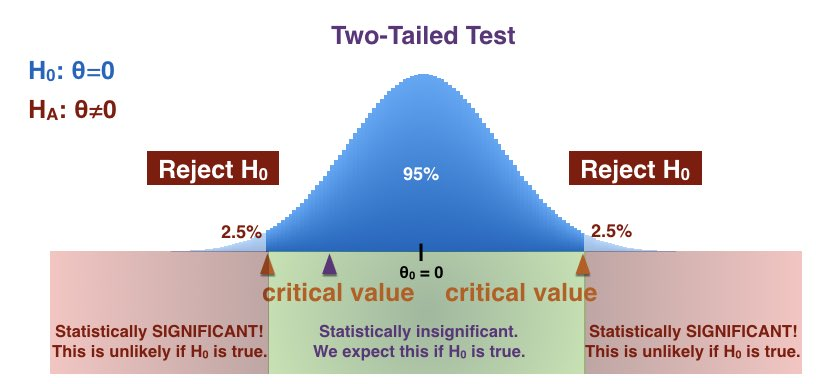

Hypothesis testing is the process of using statistics to determine the probability that a specific hypothesis is true. 
It formulates 2 hypothesis.

>- **Null Hypothesis ($H_0$) :** proposes the observations are a results of pure chance and there is no relationship and difference between 2 or more groups.
>- **Alternative Hypothesis ($H_a$) :** states the sample observations are influenced by non- random cause and there is some realtionship and difference between 2 or more groups.

**significance level ($\alpha$) :**
The significance level (denoted by the Greek letter $\alpha$) is the probability threshold that determines when you reject the null hypothesis. Often, researchers choose a significant level of 0.01, 0.05, or 0.10, but any value between 0 and 1 can be used. Setting the significant level α = 0.01 means that there is a 1% chance that you will accept your alternative hypothesis when your null hypothesis is actually true.

For our example, we will set a significant level of α = 0.05.

# Importing necessary Package

In [1]:
from pyforest import *

import statsmodels.stats.api as sm
from scipy import stats
from scipy.stats import shapiro, anderson, pearsonr, ttest_ind, mannwhitneyu

# Loading Dataset

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
new_df = df[['Age','Fare','Survived']].dropna()
new_df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [4]:
len(new_df)

714

In [5]:
survived = new_df[new_df.Survived == 1]
died = new_df[new_df.Survived == 0]

## Visualizing Age Distribution:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Age')

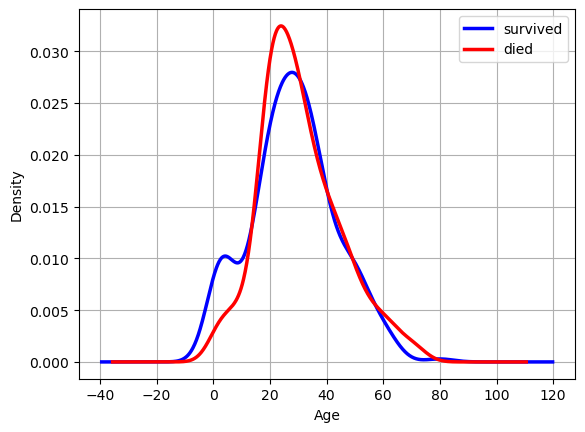

In [6]:
survived['Age'].plot(kind='kde', color='blue',lw=2.5, grid= True)
died['Age'].plot(kind='kde', color='red',lw=2.5, grid= True)
plt.legend(['survived','died'])
plt.xlabel('Age')

## Visualizing Fare Distribution:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Fare')

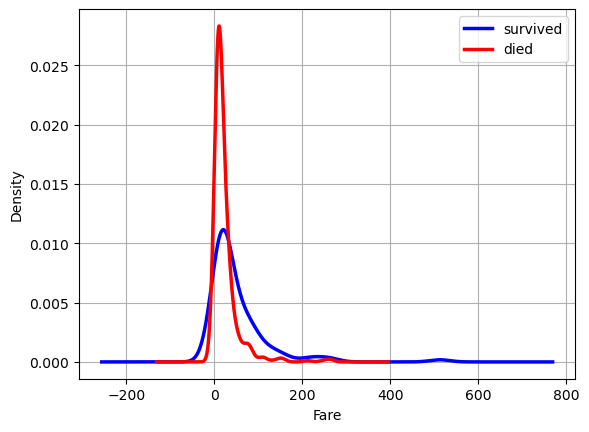

In [7]:
survived['Fare'].plot(kind='kde', color='blue',lw=2.5, grid= True,)
died['Fare'].plot(kind='kde', color='red',lw=2.5, grid= True)
plt.legend(['survived','died'])
plt.xlabel('Fare')

# Hypothesis Test to understand

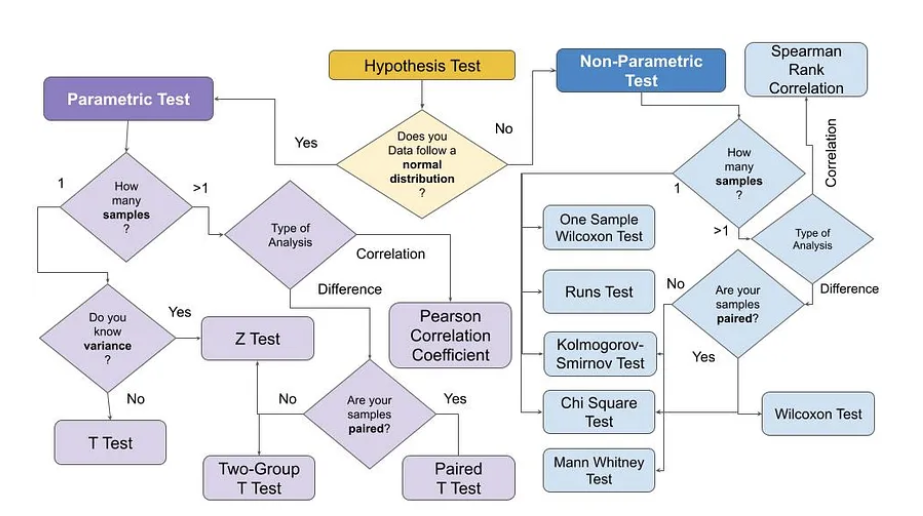

## Variable Distribution Type Tests (Gaussian)
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test


# Step:1 Normality Check

### 1. Shapiro Test

The Shapiro-Wilk test is a statistical test used to assess whether a given sample comes from a normally distributed population. It tests the null hypothesis that a sample is drawn from a normal distribution. The test is sensitive to deviations from normality in the tails of the distribution.

Here's a general overview of how the test works:

- **Null Hypothesis (H0):** The data follows a normal distribution.
- **Alternative Hypothesis (Ha):** The data does not follow a normal distribution.

The test statistic is calculated from the sample data, and a p-value is obtained. The p-value represents the probability of observing a test statistic as extreme as the one computed from the sample, assuming the null hypothesis is true.

If the p-value is less than the chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the data does not follow a normal distribution.
If the p-value is greater than the significance level, there is insufficient evidence to reject the null hypothesis, and it is assumed that the data follows a normal distribution.

In [8]:
# Shapiro Test for Age from Survived and died passenger

In [9]:
stat, p_value =shapiro(survived.Age)
print(p_value)

0.0014263729099184275


In [10]:
stat, p_value =shapiro(died.Age)
print(p_value)

7.816021252438077e-08


In [11]:
# Shapiro Test for Fare from Survived and died passenger

In [12]:
stat, p_value =shapiro(survived.Fare)
print(p_value)

2.963307919251319e-25


In [13]:
stat, p_value =shapiro(died.Fare)
print(p_value)

3.4173530956723984e-32


#### Both Age and Fare have p value < 0.05
=> Weak evidence against normally distributed data and null hypothesis is rejected.

### 2. Visual Normality Checks (Q-Q Plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

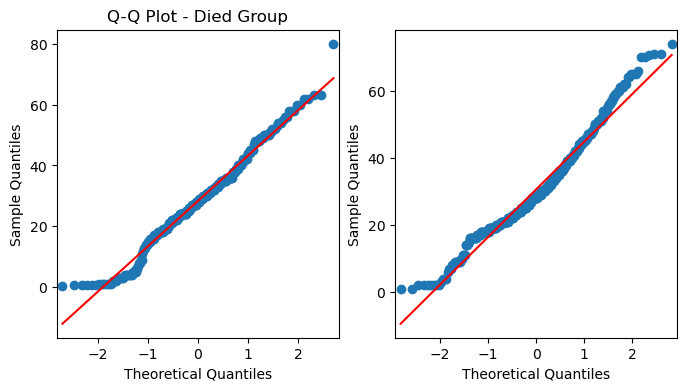

In [15]:
from statsmodels.graphics.gofplots import qqplot
fig, axs =plt.subplots(1,2,figsize=(8,4))

qqplot(survived.Age, line='s', ax=axs[0])
axs[0].set_title('Q-Q Plot - Survived Group')

qqplot(died.Age, line='s', ax=axs[1])
axs[0].set_title('Q-Q Plot - Died Group')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

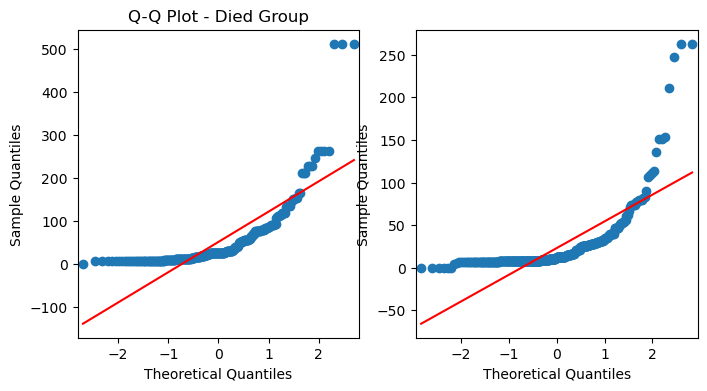

In [16]:
fig, axs =plt.subplots(1,2,figsize=(8,4))

qqplot(survived.Fare, line='s', ax=axs[0])
axs[0].set_title('Q-Q Plot - Survived Group')

qqplot(died.Fare, line='s', ax=axs[1])
axs[0].set_title('Q-Q Plot - Died Group')

plt.show()

### 3. Visual Normality Checks (Histogram)

<Axes: ylabel='Frequency'>

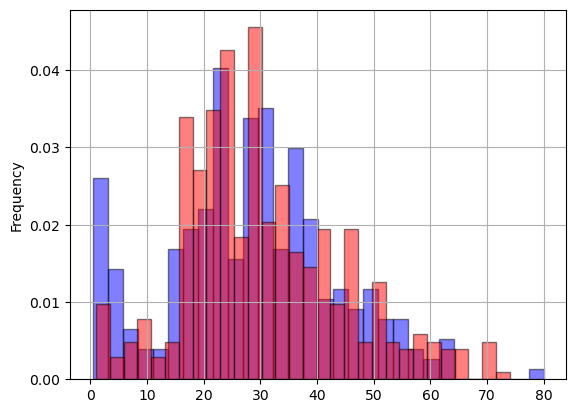

In [17]:
survived['Age'].plot(kind='hist', bins=30, grid= True,density=True, edgecolor='black' ,color='blue',alpha=0.5)
died['Age'].plot(kind='hist', bins=30, grid= True,density=True, edgecolor='black' ,color='red',alpha=0.5)

<Axes: ylabel='Frequency'>

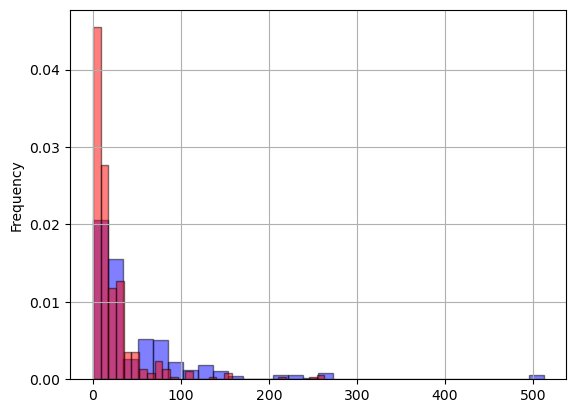

In [18]:
survived['Fare'].plot(kind='hist', bins=30, grid= True,density=True, edgecolor='black' ,color='blue',alpha=0.5)
died['Fare'].plot(kind='hist', bins=30, grid= True,density=True, edgecolor='black' ,color='red',alpha=0.5)

# Step-2 :Parametric and non-parametric test

If Data Is normally distributed:

  > Use Parametric Statistical Methods : t-Test, z- test, ANOVA -test
 
Else:
  > Use Nonparametric Statistical Methods : Mann-Whiney U-Test

#### - **Independent Samples T-Test**

- **Scenario:** You have two independent groups, and each data point in one group is not related to the data points in the other group.
Interpretation

> - H0: the means of the samples are equal.
> - H1: the means of the samples are unequal.

#### - **Mann-Whitney U-Test**

- **Scenario:**
> -  H0: the distributions of both samples are equal.
> -  H1: the distributions of both samples are not equal.

### Man-Whitney U-Test

In [23]:
# def ttest(var1, var2, alpha = 0.05):
#     t_stat, p_value = stats.ttest_ind(var1, var2)
#     if p_value < alpha:
#         return (f'p-value :{p_value} < {alpha} ', 'Null Hypothesis is rejected.')  
#     else:
#         return (f'p-value :{p_value} >= {alpha}', 'Null Hypothesis is not rejected')

# def survived_vs_died_ttest(df, col, alpha =0.05):
#     survive =df[df.Survived==1][col]
#     die = df[df.Survived==0][col]
#     return ttest(survive, die, alpha)
    
def utest(var1, var2, alpha = 0.05):
    t_stat, p_value = stats.mannwhitneyu(var1, var2)
    if p_value < alpha:
        return (f'p-value :{p_value} < {alpha} ', 'Null Hypothesis is rejected.')  
    else:
        return (f'p-value :{p_value} >= {alpha}', 'Null Hypothesis is not rejected')

def survived_vs_died(df, col, alpha =0.05):
    survive =df[df.Survived==1][col]
    die = df[df.Survived==0][col]
    return utest(survive, die, alpha)

In [31]:
sample_df = new_df.sample(200)
sample_df

,Age,Fare,Survived
123,32.5,13.0000,1
211,35.0,21.0000,1
59,11.0,46.9000,0
440,45.0,26.2500,1
850,4.0,31.2750,0
...,...,...,...
728,25.0,26.0000,0
352,15.0,7.2292,0
203,45.5,7.2250,0
500,17.0,8.6625,0


## Hypothesis Test for 'Fare'

- **Null Hypothesis :** There is no difference in Fare between those who survived and those who died.
- **Alternate Hypothesis :** There is significan difference in Fare between those who survived and those who died.

In [32]:
survived_vs_died(sample_df, 'Fare' )

('p-value :1.6557536053153754e-05 < 0.05 ', 'Null Hypothesis is rejected.')

### **Interpretation:** 
The null hypothesis (that there is no difference in Fare between those who survived and those who died) is rejected. There is evidence to suggest a significant difference in Fare for passengers who survived compared to those who did not survive.

In [33]:
survived_vs_died(sample_df, 'Age' )

('p-value :0.020289704345623008 < 0.05 ', 'Null Hypothesis is rejected.')

### **Interpretation:** 
The null hypothesis (that there is no difference in Age between survived and died passengers) is rejected. There is evidence to suggest a significant difference in Age  for passengers who survived compared to those who did not survive.

- https://machinelearningmastery.com/statistical-hypothesis-tests/
- https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/